<a href="https://colab.research.google.com/github/IA2021UR/trabajo-ia-en-la-comunidad-de-la-rioja-equipo-10/blob/main/Trabajo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Documentación.

Apuntes del curso.

Entregable 2 del curso. 

https://walkwithfastai.com/Custom 

Dataset imágenes.

https://unirioja-my.sharepoint.com/:u:/g/personal/joheras_unirioja_es/EWyDMGupN_BBqw8KMLQfvXkBmaycNInw9c5SMjvRsjNhEA?e=6Qu9IL 

Metadatos.

https://unirioja-my.sharepoint.com/:x:/g/personal/joheras_unirioja_es/ESCA5atNrCZPlohCYhJ_VbYB6D_NDQSWA1NOH8b_a-Mo3Q?e=MLWcZW 

Requisitos mínimos.

Para superar este trabajo deberéis crear un modelo para clasificar imágenes en las categorías que hayáis definido, y una aplicación que lo utilice.

Por último deberéis crear un vídeo corto (aproximadamente 2 minutos) donde expliquéis de manera no técnica lo que habéis hecho. 

Realizando de manera correcta las dos tareas anteriores, obtendréis entre un 6.5 y un 7.5 en la nota del trabajo.

Ampliaciones. 

Entrenar modelos con la librería timm. Pueden ser integrados con lo visto en el entregable.  

Crear un modelo para no solo datar sino también etiquetar las obras. 

Intentar sacar información interesada a partir del texto asociada con las imágenes. 

Cualquier otra ampliación que se os ocurra.

Todas las ampliaciones deberán ser documentadas en los notebooks. 

In [1]:
!wget https://www.dropbox.com/s/8bderlaqfere52h/var.zip?dl=1 -O dataset

--2021-05-23 15:49:24--  https://www.dropbox.com/s/8bderlaqfere52h/var.zip?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.4.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.4.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/8bderlaqfere52h/var.zip [following]
--2021-05-23 15:49:24--  https://www.dropbox.com/s/dl/8bderlaqfere52h/var.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucbef32bd688d62af55402feace4.dl.dropboxusercontent.com/cd/0/get/BPBAQ69wiTfbgQxhDXaU-CmsLP2hP2ZugIxvIlmMRAWsX0QM8DBvd-S8mDj0rKepyocI3ZTsDGkh8Ct0T6v0o-5PI-Z89-IAJkT-MU2ZQz4JsFMrWFAvoF2MdwWvX_EsWr2Wz-7j75wnCDXh1nMxonEp/file?dl=1# [following]
--2021-05-23 15:49:25--  https://ucbef32bd688d62af55402feace4.dl.dropboxusercontent.com/cd/0/get/BPBAQ69wiTfbgQxhDXaU-CmsLP2hP2ZugIxvIlmMRAWsX0QM8DBvd-S8mDj0rKepyocI3ZTsDGkh8Ct0T6v0o-5PI-Z89-IAJkT-MU2

In [2]:
!unzip dataset

Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: var/ftp/celerra/audiovisual/CMU_MUR/imagenes/N010080/2/27949.jpg  
  inflating: var/ftp/celerra/audiovisual/CMU_MUR/imagenes/N010080/2/28728.jpg  
  inflating: var/ftp/celerra/audiovisual/CMU_MUR/imagenes/N010080/2/30674.jpg  
  inflating: var/ftp/celerra/audiovisual/CMU_MUR/imagenes/N010080/2/30675.jpg  
  inflating: var/ftp/celerra/audiovisual/CMU_MUR/imagenes/N010080/2/30677.jpg  
  inflating: var/ftp/celerra/audiovisual/CMU_MUR/imagenes/N010080/2/30678.jpg  
  inflating: var/ftp/celerra/audiovisual/CMU_MUR/imagenes/N010080/2/30679.jpg  
  inflating: var/ftp/celerra/audiovisual/CMU_MUR/imagenes/N010080/2/30680.jpg  
  inflating: var/ftp/celerra/audiovisual/CMU_MUR/imagenes/N010080/2/30683.jpg  
  inflating: var/ftp/celerra/audiovisual/CMU_MUR/imagenes/N010080/2/30685.jpg  
  inflating: var/ftp/celerra/audiovisual/CMU_MUR/imagenes/N010080/2/30687.jpg  
  inflating: var/ftp/celerra/audiovisual/CMU_MUR/imagenes/N

In [3]:
import pandas as pd

In [4]:
df = pd.read_excel('/content/MuseoDeLaRioja.xlsx', usecols=["EDAD","ID_NUM", "DATACION_INICIAL", "PRECISION_INICIAL", "DATACION_FINAL", "PRECISION_FINAL"])
df.head()

,ID_NUM,EDAD,DATACION_INICIAL,PRECISION_INICIAL,DATACION_FINAL,PRECISION_FINAL
0,5186,7.0,19.0,sig,1912.0,ant
1,4924,7.0,1900.0,ca,1975.0,ca
2,4925,7.0,1900.0,ca,1975.0,ca
3,4926,7.0,1900.0,ca,1950.0,ca
4,4927,7.0,1900.0,ca,1950.0,ca


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID_NUM             3182 non-null   int64  
 1   EDAD               2917 non-null   float64
 2   DATACION_INICIAL   3176 non-null   float64
 3   PRECISION_INICIAL  3165 non-null   object 
 4   DATACION_FINAL     3108 non-null   float64
 5   PRECISION_FINAL    2923 non-null   object 
dtypes: float64(3), int64(1), object(2)
memory usage: 149.3+ KB
None


In [6]:
!mkdir cleanedDataset

In [7]:
import os 
from google.colab import files
import shutil
import PIL

In [8]:
print(os.listdir('/content/var/ftp/celerra/audiovisual/CMU_MUR/imagenes/N010080'))

['19', '12', '9', '14', '8', '24', '25', '15', '11', '4', '6', '23', '5', '2', '20', '7', '22', '16', '18', '10', '27', '21', '26', '3', '17', '1', '13']


In [9]:
def cleanDataset(directorioOrigen, directorioDestino):
  contenido = os.listdir(directorioOrigen)
  for fichero in contenido:
    if (os.path.isdir(os.path.join(directorioOrigen,os.path.basename(fichero)))):
      cleanDataset(os.path.join(directorioOrigen,os.path.basename(fichero)), directorioDestino) 
    else :
      if (os.path.exists(directorioDestino + '/' + os.path.basename(fichero))):
        image1 = PIL.Image.open(directorioDestino + '/' + os.path.basename(fichero))
        image2 = PIL.Image.open(os.path.join(directorioOrigen,os.path.basename(fichero)))
        width1, height1 = image1.size
        width2, height2 = image2.size
        if (width1 < width2 and height1 < height2):
          os.remove(directorioDestino + '/' + os.path.basename(fichero))
          shutil.copyfile(os.path.join(directorioOrigen,os.path.basename(fichero)), directorioDestino + '/' + os.path.basename(fichero))
      else:
        shutil.copyfile(os.path.join(directorioOrigen,os.path.basename(fichero)), directorioDestino + '/' + os.path.basename(fichero))

He eliminado la imagen 8497 del directorio 11 ya que estaba corrupta y daba errores al intentar abrirla.

In [10]:
!rm /content/var/ftp/celerra/audiovisual/CMU_MUR/imagenes/N010080/11/8497.jpg

In [11]:
cleanDataset('/content/var/ftp/celerra/audiovisual/CMU_MUR/imagenes/N010080', '/content/cleanedDataset')

In [12]:
import math
def truncate(num, n):
    integer = int(num * (10**n))/(10**n)
    return float(integer)

In [13]:
def siglo(DATACION_INICIAL, PRECISION_INICIAL, DATACION_FINAL, PRECISION_FINAL):
  if (PRECISION_FINAL == 'exa'):
    if (not math.isnan(DATACION_FINAL)): # Para filtrar los que tenga valor NaN
      return truncate(DATACION_FINAL/100 + 1, 0)
    else:
      return truncate(DATACION_INICIAL/100 + 1, 0)

  elif (PRECISION_FINAL == 'sig' or PRECISION_FINAL == 'ant'):
    if ((DATACION_FINAL / 100) > 1):
      return truncate(DATACION_FINAL/100 + 1, 0)
    else:
      return DATACION_FINAL

  elif (PRECISION_FINAL == 'ca'):
    if (not math.isnan(DATACION_FINAL)):
      if ((DATACION_FINAL / 100) > 1):
        return truncate(DATACION_FINAL/100 + 1,0)
      else:
        return DATACION_FINAL
    else:
      if ((DATACION_INICIAL / 100) > 1):
        return truncate(DATACION_INICIAL/100 + 1,0)
      else:
        return DATACION_INICIAL

  elif (PRECISION_FINAL == 'aC'):
    return - truncate(DATACION_FINAL / 100 + 1, 0)

  elif (PRECISION_FINAL == 's'):
    if (not math.isnan(DATACION_FINAL)):
      return DATACION_FINAL

  elif (PRECISION_FINAL == 'dC'):
    return truncate(DATACION_FINAL/100 + 1,0)

  elif (PRECISION_FINAL == 'sdC'):
    if (not math.isnan(DATACION_FINAL)):
      return DATACION_FINAL

  elif (PRECISION_FINAL == 'saC'):
    if (not math.isnan(DATACION_FINAL)):
      return - DATACION_FINAL
  
  ##

  elif (PRECISION_INICIAL == 'exa'):
    if (not math.isnan(DATACION_INICIAL)): # Para filtrar los que tenga valor NaN
      return truncate(DATACION_INICIAL/100 + 1, 0)

  elif (PRECISION_INICIAL == 'sig' or PRECISION_INICIAL == 'ant'):
    if ((DATACION_INICIAL / 100) > 1):
      return truncate(DATACION_INICIAL/100 + 1, 0)
    else:
      return DATACION_INICIAL

  elif (PRECISION_INICIAL == 'ca'):
    if (not math.isnan(DATACION_INICIAL)):
      if ((DATACION_INICIAL / 100) > 1):
        return truncate(DATACION_INICIAL/100 + 1,0)
      else:
        return DATACION_INICIAL

  elif (PRECISION_INICIAL == 'aC'):
    return - truncate(DATACION_INICIAL / 100 + 1,0)

  elif (PRECISION_INICIAL == 's'):
    if (not math.isnan(DATACION_INICIAL)):
      return DATACION_INICIAL

  elif (PRECISION_INICIAL == 'dC'):
    return truncate(DATACION_INICIAL/100 + 1,0)

  elif (PRECISION_INICIAL == 'sdC'):
    if (not math.isnan(DATACION_INICIAL)):
      return DATACION_INICIAL

  elif (PRECISION_INICIAL == 'saC'):
    if (not math.isnan(DATACION_INICIAL)):
      return - DATACION_INICIAL 
    
    ## elif (PRECISION_FINAL == 'pos'): No hemos tratado pos ya que todos tenian PRECISION_FINAL

In [14]:
df['Siglo'] = df.apply(lambda row: siglo(row.DATACION_INICIAL, row.PRECISION_INICIAL, row.DATACION_FINAL, row.PRECISION_FINAL), axis=1)

In [15]:
!pip install fastai --upgrade

     |████████████████████████████████| 204kB 30.2MB/s 
     |████████████████████████████████| 61kB 10.5MB/s 
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [16]:
from fastai.vision.all import *
import os
from google.colab import files
from sklearn.model_selection import train_test_split
import shutil

In [17]:
path = Path('data/museo')

In [18]:
df['Siglo'].value_counts()

 20.0        1907
 3.0          186
 19.0         129
 4.0          121
-21.0         100
 2.0           89
 18.0          86
 16.0          84
 1.0           78
 17.0          53
-351.0         48
-8.0           47
-7.0           35
-26.0          34
-5.0           20
-11.0          20
 14.0          17
-1281.0        15
-1.0           15
 15.0          15
 21.0          14
-16.0          14
 5.0            7
 13.0           6
 11.0           5
-128000.0       5
 6.0            4
 12.0           3
 10.0           2
 100.0          1
 198.0          1
Name: Siglo, dtype: int64

In [19]:
df[df['Siglo'] == -351]

,ID_NUM,EDAD,DATACION_INICIAL,PRECISION_INICIAL,DATACION_FINAL,PRECISION_FINAL,Siglo
2578,6067,1.0,128000.0,aC,35000.0,aC,-351.0
2583,6395,1.0,128000.0,aC,35000.0,aC,-351.0
2591,7028,1.0,128000.0,aC,35000.0,aC,-351.0
2592,7029,1.0,128000.0,aC,35000.0,aC,-351.0
2593,7030,1.0,128000.0,aC,35000.0,aC,-351.0
2594,7031,1.0,128000.0,aC,35000.0,aC,-351.0
2595,7032,1.0,128000.0,aC,35000.0,aC,-351.0
2596,7033,1.0,128000.0,aC,35000.0,aC,-351.0
2597,7035,1.0,128000.0,aC,35000.0,aC,-351.0
2598,7036,1.0,128000.0,aC,35000.0,aC,-351.0


Hacemos limpieza de años incorrectos en el dataset

In [20]:
df[df['Siglo']== 198]

,ID_NUM,EDAD,DATACION_INICIAL,PRECISION_INICIAL,DATACION_FINAL,PRECISION_FINAL,Siglo
651,9935,7.0,1950.0,ca,19750.0,ca,198.0


Vemos que la datación final es errónea, (sobra algún número en la datación final).

In [21]:
df['Siglo'].replace({198 : 20}, inplace = True)

In [22]:
df[df['ID_NUM']== 9935]

,ID_NUM,EDAD,DATACION_INICIAL,PRECISION_INICIAL,DATACION_FINAL,PRECISION_FINAL,Siglo
651,9935,7.0,1950.0,ca,19750.0,ca,20.0


In [23]:
df[df['Siglo'] == 100]

,ID_NUM,EDAD,DATACION_INICIAL,PRECISION_INICIAL,DATACION_FINAL,PRECISION_FINAL,Siglo
2435,6427,2.0,200.0,saC,100.0,sdC,100.0


In [24]:
df['Siglo'].replace({100 : -100}, inplace = True)

In [25]:
df[df['ID_NUM']== 6427]

,ID_NUM,EDAD,DATACION_INICIAL,PRECISION_INICIAL,DATACION_FINAL,PRECISION_FINAL,Siglo
2435,6427,2.0,200.0,saC,100.0,sdC,-100.0


In [26]:
df[df['Siglo']== -128000.0]

,ID_NUM,EDAD,DATACION_INICIAL,PRECISION_INICIAL,DATACION_FINAL,PRECISION_FINAL,Siglo
2858,7157,1.0,700000.0,saC,128000.0,saC,-128000.0
2907,9206,1.0,700000.0,saC,128000.0,saC,-128000.0
2908,9207,1.0,700000.0,saC,128000.0,saC,-128000.0
2909,9208,1.0,700000.0,saC,128000.0,saC,-128000.0
2910,9209,1.0,700000.0,saC,128000.0,saC,-128000.0


xd

In [27]:
for im in verify_images(get_image_files('/content/cleanedDataset')):
    os.remove(str(im))

In [28]:
def moveImages(directorioOrigen):
  contenido = os.listdir(directorioOrigen)
  for fichero in contenido:
    if (bool(df.loc[df['ID_NUM'] == float(os.path.splitext(os.path.basename(fichero))[0])]['Siglo'].to_dict())): # Comprobamos que esta, porque hay imagenes que no estan en el DataFrame y viceversa
      dictionary = df[df['ID_NUM'] == float(os.path.splitext(os.path.basename(fichero))[0])]['Siglo'].to_dict()
      siglo = float([x for x in dictionary.values()][0])
      if (not math.isnan(siglo)):
        siglo = str(int(siglo))
        if (not os.path.exists('/content/'+ siglo)):
          os.mkdir(siglo)
        shutil.copyfile(os.path.join(directorioOrigen,os.path.basename(fichero)), '/content/'+ siglo + '/' + os.path.basename(fichero))

In [31]:
moveImages('/content/cleanedDataset')

ole

**Nos hemos dado cuenta de que hay muchos grupos que se quedan con sólo 1 imagen. Esto es un problema, ya que no se puede partir el dataset para entrenamiento y para test. Hemos decidido que las carpetas (los siglos) con una sola imagen, las vamos a borrar.**

In [36]:
(path/'train/-1281').mkdir(parents=True,exist_ok=True)
(path/'train/-16').mkdir(parents=True,exist_ok=True)
(path/'train/-21').mkdir(parents=True,exist_ok=True)
(path/'train/-351').mkdir(parents=True,exist_ok=True)
(path/'train/-7').mkdir(parents=True,exist_ok=True)
(path/'train/1').mkdir(parents=True,exist_ok=True)
(path/'train/11').mkdir(parents=True,exist_ok=True)
(path/'train/12').mkdir(parents=True,exist_ok=True)
(path/'train/13').mkdir(parents=True,exist_ok=True)
(path/'train/14').mkdir(parents=True,exist_ok=True)
(path/'train/15').mkdir(parents=True,exist_ok=True)
(path/'train/16').mkdir(parents=True,exist_ok=True)
(path/'train/17').mkdir(parents=True,exist_ok=True)
(path/'train/18').mkdir(parents=True,exist_ok=True)
(path/'train/19').mkdir(parents=True,exist_ok=True)
(path/'train/2').mkdir(parents=True,exist_ok=True)
(path/'train/20').mkdir(parents=True,exist_ok=True)
(path/'train/21').mkdir(parents=True,exist_ok=True)
(path/'train/3').mkdir(parents=True,exist_ok=True)
(path/'train/4').mkdir(parents=True,exist_ok=True)


(path/'test/-1281').mkdir(parents=True,exist_ok=True)
(path/'test/-16').mkdir(parents=True,exist_ok=True)
(path/'test/-21').mkdir(parents=True,exist_ok=True)
(path/'test/-351').mkdir(parents=True,exist_ok=True)
(path/'test/-7').mkdir(parents=True,exist_ok=True)
(path/'test/1').mkdir(parents=True,exist_ok=True)
(path/'test/11').mkdir(parents=True,exist_ok=True)
(path/'test/12').mkdir(parents=True,exist_ok=True)
(path/'test/13').mkdir(parents=True,exist_ok=True)
(path/'test/14').mkdir(parents=True,exist_ok=True)
(path/'test/15').mkdir(parents=True,exist_ok=True)
(path/'test/16').mkdir(parents=True,exist_ok=True)
(path/'test/17').mkdir(parents=True,exist_ok=True)
(path/'test/18').mkdir(parents=True,exist_ok=True)
(path/'test/19').mkdir(parents=True,exist_ok=True)
(path/'test/2').mkdir(parents=True,exist_ok=True)
(path/'test/20').mkdir(parents=True,exist_ok=True)
(path/'test/21').mkdir(parents=True,exist_ok=True)
(path/'test/3').mkdir(parents=True,exist_ok=True)
(path/'test/4').mkdir(parents=True,exist_ok=True)


In [44]:
print(path)

data/museo


In [47]:
trainMenosMilDoscientosOchentaYUno, testMenosMilDoscientosOchentaYUno = train_test_split(get_image_files('/content/-1281'),test_size=0.3,random_state=15)
trainMenosDieciseis, testMenosDieciseis = train_test_split(get_image_files('/content/-16'),test_size=0.25,random_state=15)
trainMenosVeintiuno, testMenosVeintiuno = train_test_split(get_image_files('/content/-21'),test_size=0.33,random_state=15)
trainMenosTrescientosCincuentayUno, testMenosTrescientosCincuentayUno = train_test_split(get_image_files('/content/-351'),test_size=0.2,random_state=15)
trainMenosSiete, testMenosSiete = train_test_split(get_image_files('/content/-7'),test_size=0.5,random_state=15)
trainMasUno, testMasUno = train_test_split(get_image_files('/content/1'),test_size=0.2,random_state=15)
trainMasOnce, testMasOnce = train_test_split(get_image_files('/content/11'),test_size=0.33,random_state=15)
trainMasDoce, testMasDoce = train_test_split(get_image_files('/content/12'),test_size=0.33,random_state=15)
trainMasTrece, testMasTrece = train_test_split(get_image_files('/content/13'),test_size=0.33,random_state=15)
trainMasCatorce, testMasCatorce = train_test_split(get_image_files('/content/14'),test_size=0.25,random_state=15)
trainMasQuince, testMasQuince = train_test_split(get_image_files('/content/15'),test_size=0.3,random_state=15)
trainMasDieciseis, testMasDieciseis = train_test_split(get_image_files('/content/16'),test_size=0.3,random_state=15)
trainMasDiecisiete, testMasDiecisiete = train_test_split(get_image_files('/content/17'),test_size=0.3,random_state=15)
trainMasDieciocho, testMasDieciocho = train_test_split(get_image_files('/content/18'),test_size=0.3,random_state=15)
trainMasDiecinueve, testMasDiecinueve = train_test_split(get_image_files('/content/19'),test_size=0.3,random_state=15)
trainMasDos, testMasDos = train_test_split(get_image_files('/content/2'),test_size=0.3,random_state=15)
trainMasVeinte, testMasVeinte = train_test_split(get_image_files('/content/20'),test_size=0.00005,random_state=15)
trainMasTres, testMasTres = train_test_split(get_image_files('/content/3'),test_size=0.3,random_state=15)
trainMasCuatro, testMasCuatro = train_test_split(get_image_files('/content/4'),test_size=0.3,random_state=15)

In [49]:
for x in trainMenosMilDoscientosOchentaYUno:
  shutil.move(str(x),path/('train/-1281/'+x.name))

for x in trainMenosDieciseis:
  shutil.move(str(x),path/('train/-16/'+x.name))

for x in trainMenosVeintiuno:
  shutil.move(str(x),path/('train/-21/'+x.name))

for x in trainMenosTrescientosCincuentayUno:
  shutil.move(str(x),path/('train/-351/'+x.name))

for x in trainMenosSiete:
  shutil.move(str(x),path/('train/-7/'+x.name))

for x in trainMasUno:
  shutil.move(str(x),path/('train/1/'+x.name))

for x in trainMasOnce:
  shutil.move(str(x),path/('train/11/'+x.name))

for x in trainMasDoce:
  shutil.move(str(x),path/('train/12/'+x.name))

for x in trainMasTrece:
  shutil.move(str(x),path/('train/13/'+x.name))

for x in trainMasCatorce:
  shutil.move(str(x),path/('train/14/'+x.name))

for x in trainMasQuince:
  shutil.move(str(x),path/('train/15/'+x.name))

for x in trainMasDieciseis:
  shutil.move(str(x),path/('train/16/'+x.name))

for x in trainMasDiecisiete:
  shutil.move(str(x),path/('train/17/'+x.name))

for x in trainMasDieciocho:
  shutil.move(str(x),path/('train/18/'+x.name))

for x in trainMasDiecinueve:
  shutil.move(str(x),path/('train/19/'+x.name))

for x in trainMasDos:
  shutil.move(str(x),path/('train/2/'+x.name))

for x in trainMasVeinte:
  shutil.move(str(x),path/('train/20/'+x.name))

for x in trainMasTres:
  shutil.move(str(x),path/('train/3/'+x.name))

for x in trainMasCuatro:
  shutil.move(str(x),path/('train/4/'+x.name))









for x in testMenosMilDoscientosOchentaYUno:
  shutil.move(str(x),path/('test/-1281/'+x.name))

for x in testMenosDieciseis:
  shutil.move(str(x),path/('test/-16/'+x.name))

for x in testMenosVeintiuno:
  shutil.move(str(x),path/('test/-21/'+x.name))

for x in testMenosTrescientosCincuentayUno:
  shutil.move(str(x),path/('test/-351/'+x.name))

for x in testMenosSiete:
  shutil.move(str(x),path/('test/-7/'+x.name))

for x in testMasUno:
  shutil.move(str(x),path/('test/1/'+x.name))

for x in testMasOnce:
  shutil.move(str(x),path/('test/11/'+x.name))

for x in testMasDoce:
  shutil.move(str(x),path/('test/12/'+x.name))

for x in testMasTrece:
  shutil.move(str(x),path/('test/13/'+x.name))

for x in testMasCatorce:
  shutil.move(str(x),path/('test/14/'+x.name))

for x in testMasQuince:
  shutil.move(str(x),path/('test/15/'+x.name))

for x in testMasDieciseis:
  shutil.move(str(x),path/('test/16/'+x.name))

for x in testMasDiecisiete:
  shutil.move(str(x),path/('test/17/'+x.name))

for x in testMasDieciocho:
  shutil.move(str(x),path/('test/18/'+x.name))

for x in testMasDiecinueve:
  shutil.move(str(x),path/('test/19/'+x.name))

for x in testMasDos:
  shutil.move(str(x),path/('test/2/'+x.name))

for x in testMasVeinte:
  shutil.move(str(x),path/('test/20/'+x.name))

for x in testMasTres:
  shutil.move(str(x),path/('test/3/'+x.name))

for x in testMasCuatro:
  shutil.move(str(x),path/('test/4/'+x.name))


In [54]:
shutil.rmtree('/content/-1')
shutil.rmtree('/content/-1281')
shutil.rmtree('/content/-16')
shutil.rmtree('/content/-21')
shutil.rmtree('/content/-26')
shutil.rmtree('/content/-351')
shutil.rmtree('/content/-7')
shutil.rmtree('/content/1')
shutil.rmtree('/content/10')
shutil.rmtree('/content/11')
shutil.rmtree('/content/12')
shutil.rmtree('/content/13')
shutil.rmtree('/content/14')
shutil.rmtree('/content/15')
shutil.rmtree('/content/16')
shutil.rmtree('/content/17')
shutil.rmtree('/content/18')
shutil.rmtree('/content/19')
shutil.rmtree('/content/2')
shutil.rmtree('/content/20')
shutil.rmtree('/content/21')
shutil.rmtree('/content/3')
shutil.rmtree('/content/4')
shutil.rmtree('/content/5')
shutil.rmtree('/content/cleanedDataset')
shutil.rmtree('/content/var')

AHORA CON EL MODELIO A HACER DIAGRAMAS XD

In [55]:
db = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=RandomSplitter(valid_pct=0.2,seed=42),
                 get_y=parent_label,
                 item_tfms = Resize(512),
                 batch_tfms=aug_transforms(size=256,min_scale=0.75))

In [62]:
trainPath = Path('/content/data/museo/train')

In [63]:
trainPath.ls()

(#24) [Path('/content/data/museo/train/19'),Path('/content/data/museo/train/-16'),Path('/content/data/museo/train/12'),Path('/content/data/museo/train/-351'),Path('/content/data/museo/train/14'),Path('/content/data/museo/train/-1'),Path('/content/data/museo/train/-1281'),Path('/content/data/museo/train/15'),Path('/content/data/museo/train/11'),Path('/content/data/museo/train/4')...]

In [64]:
dls = db.dataloaders(trainPath,bs=128)

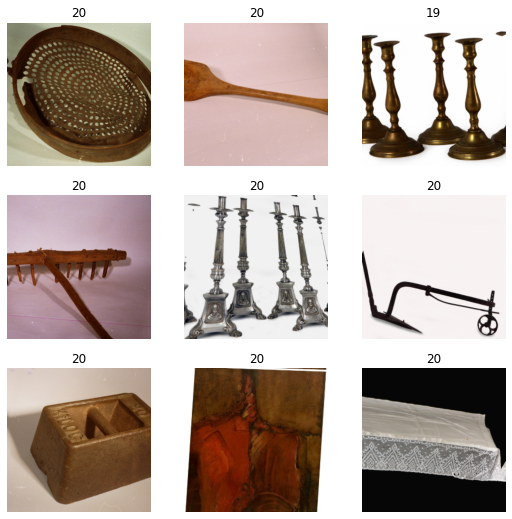

In [65]:
dls.show_batch()

In [66]:
learn = cnn_learner(dls,resnet18,metrics=accuracy).to_fp16()

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


In [67]:
learn.fine_tune(10,base_lr=1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,4.599922,4.042239,0.038760,00:55


epoch,train_loss,valid_loss,accuracy,time
0,4.304299,3.469621,0.069767,00:54
1,4.228148,3.104908,0.139535,00:55
2,4.068763,2.692418,0.302326,00:55
3,3.873590,2.434506,0.434109,00:54
4,3.650609,2.248910,0.488372,00:54
5,3.451404,2.179066,0.527132,00:55
6,3.284594,2.089302,0.558140,00:55
7,3.115490,2.050856,0.565891,00:54
8,2.984914,2.039705,0.581395,00:55
9,2.871957,2.020920,0.581395,00:54


In [68]:
learn.export('primero.pkl')

In [71]:
interp = ClassificationInterpretation.from_learner(learn)

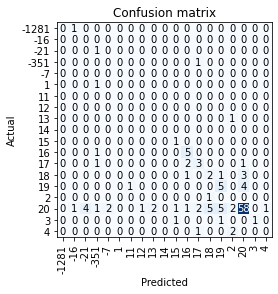

In [72]:
interp.plot_confusion_matrix()

In [73]:
dbTest = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=GrandparentSplitter(valid_name='test'),
                 get_y=parent_label,
                 item_tfms = Resize(256),
                 batch_tfms=aug_transforms(size=128,min_scale=0.75))
dlsTest = dbTest.dataloaders(path,bs=64)

In [74]:
learn.dls = dlsTest

In [75]:
learn.validate()

(#2) [3.342071771621704,0.1744185984134674]

Hemos conseguido una precisión de un 17%. Una puta mierda, vaya

In [69]:
from fastai.vision.widgets import ImageClassifierCleaner

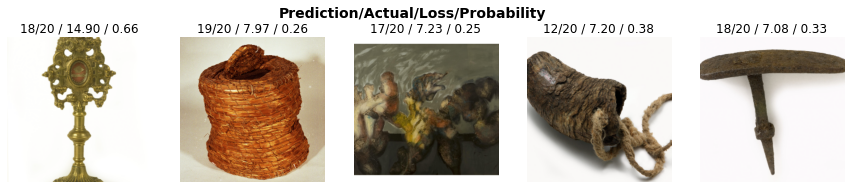

In [76]:
interp.plot_top_losses(5,nrows=1)

# Como clasificando por siglos nos ha salido un modelo horrible, vamos a intentar clasificar por épocas. Lo haremos en otro cuaderno.